
Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    135193
           1       0.76      0.74      0.75      4222

    accuracy                           0.99    139415
   macro avg       0.88      0.87      0.87    139415
weighted avg       0.98      0.99      0.99    139415

Top 10 Permutation Importances for Decision Tree (F1 Score):


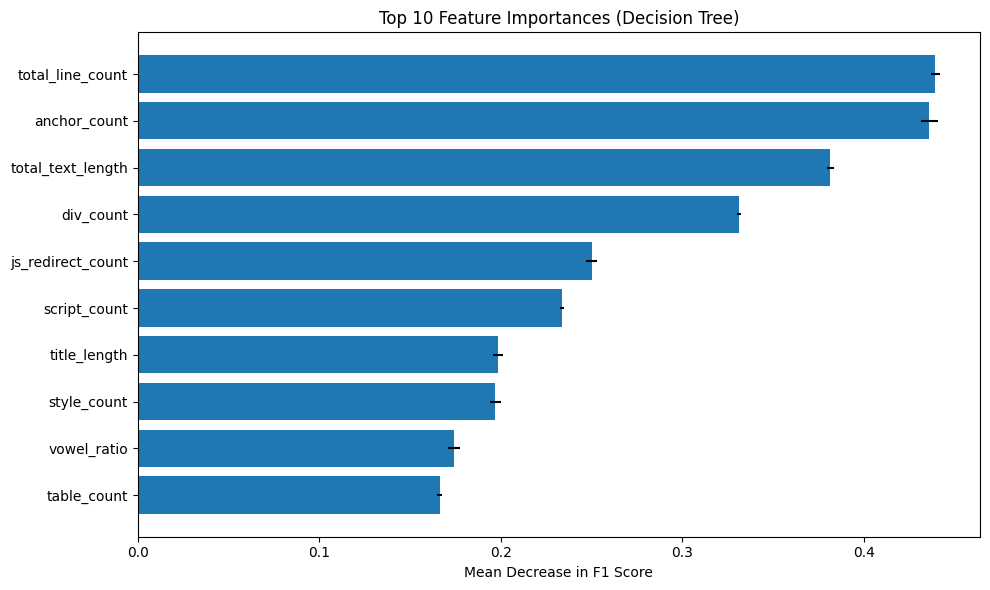

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Machine Learning Models
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.inspection import permutation_importance 

import time
from collections import Counter

# Load datasets
df1 = pd.read_csv('url_features.csv').sort_values(by='url')
df2 = pd.read_csv('new_html_features.csv').sort_values(by='url')
df3 = pd.merge(df1, df2, on="url")

df3 = pd.get_dummies(df3, columns=['tld_type'], prefix='tld')
df3 = df3.rename(columns={'label_x': 'label'})

X3 = df3.drop(['url', 'label', 'label_y'], axis=1)
y3 = df3['label']

# 25% - 174,268
# n_legit = 168040
# n_phish = 5228


# 50% - 348,536
# n_legit = 337080
# n_phish = 10456

# legit_df3 = df3[df3['label'] == 0]
# phish_df3 = df3[df3['label'] == 1]

# sampled_legit3 = legit_df3.sample(n=n_legit, random_state=42)
# sampled_phish3 = phish_df3.sample(n=n_phish, random_state=42)

# reduced_df3 = pd.concat([sampled_legit3, sampled_phish3]).sample(frac=1, random_state=42).reset_index(drop=True)

# X3 = reduced_df3.drop(['url', 'label', 'label_y'], axis=1)
# y3 = reduced_df3['label']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify=y3, test_size=0.2, random_state=42)

models = {
    # "XGBoost": XGBClassifier(random_state=42),
    # "LightGBM": LGBMClassifier(random_state=42),
    # "Random Forest": RandomForestClassifier(random_state=42),
    # "K-Nearest Neighbor": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train3, y_train3)
    pred = model.predict(X_test3)
    print(classification_report(y_test3, pred))

    # Permutation Importance with F1 Score
    print(f"Top 10 Permutation Importances for {name} (F1 Score):")
    result = permutation_importance(
        model, X_test3, y_test3, n_repeats=10, random_state=42, scoring='f1'
    )

    importances = result.importances_mean
    stds = result.importances_std
    sorted_idx = importances.argsort()[::-1][:10]

    top_features = X_test3.columns[sorted_idx]
    top_scores = importances[sorted_idx]
    top_stds = stds[sorted_idx]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_scores[::-1], xerr=top_stds[::-1])
    plt.xlabel("Mean Decrease in F1 Score")
    plt.title(f"Top 10 Feature Importances ({name})")
    plt.tight_layout()
    plt.show()



K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     67417
           1       0.82      0.69      0.75      2091

    accuracy                           0.99     69508
   macro avg       0.90      0.84      0.87     69508
weighted avg       0.99      0.99      0.99     69508

Top 10 Permutation Importances for K-Nearest Neighbor (F1 Score):


Calculating importances (features): 100%|█████████████████████████████████████████| 529/529 [12:50:30<00:00, 87.39s/it]


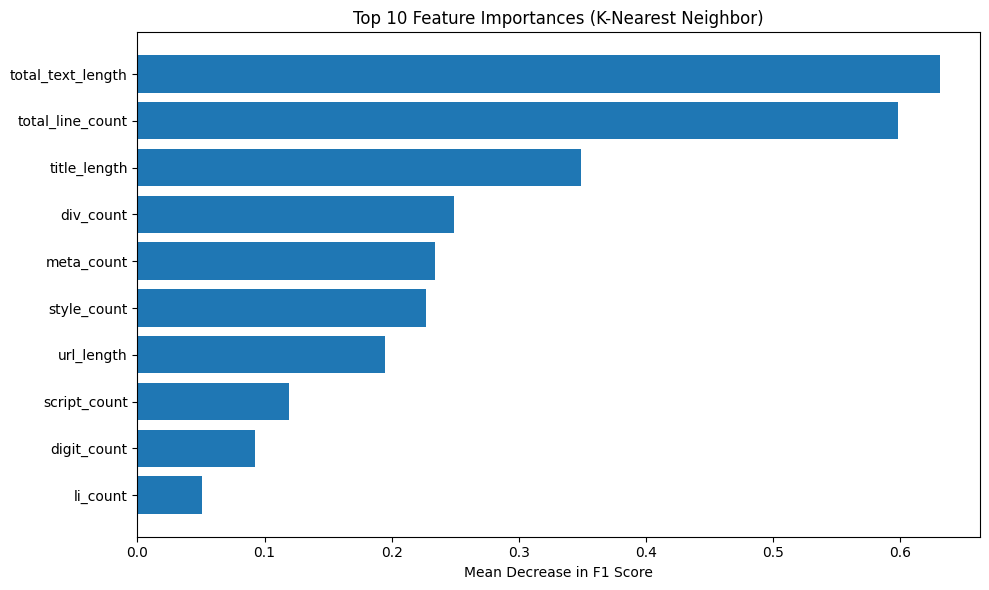


Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     67417
           1       0.74      0.71      0.73      2091

    accuracy                           0.98     69508
   macro avg       0.87      0.85      0.86     69508
weighted avg       0.98      0.98      0.98     69508

Top 10 Permutation Importances for Decision Tree (F1 Score):


Calculating importances (features): 100%|████████████████████████████████████████████| 529/529 [01:37<00:00,  5.40it/s]


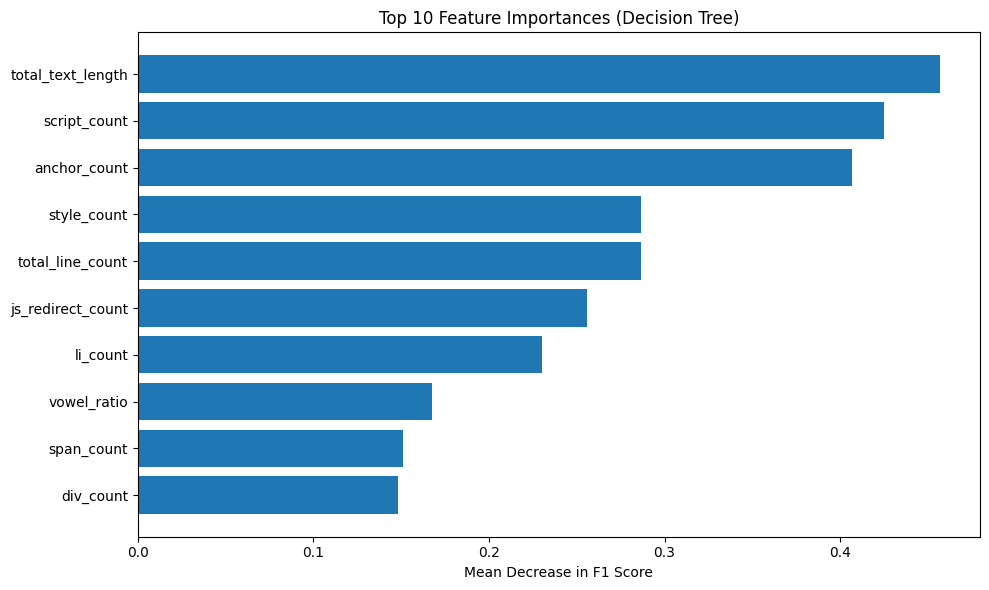

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm  #  For progress bar

# Load datasets
df1 = pd.read_csv('url_features.csv').sort_values(by='url')
df2 = pd.read_csv('new_html_features.csv').sort_values(by='url')
df3 = pd.merge(df1, df2, on="url")

df3 = pd.get_dummies(df3, columns=['tld_type'], prefix='tld')
df3 = df3.rename(columns={'label_x': 'label'})

# X3 = df3.drop(['url', 'label', 'label_y'], axis=1)
# y3 = df3['label']


# 25% - 174,268
# n_legit = 168040
# n_phish = 5228


# 50% - 348,536
n_legit = 337080
n_phish = 10456

legit_df3 = df3[df3['label'] == 0]
phish_df3 = df3[df3['label'] == 1]

sampled_legit3 = legit_df3.sample(n=n_legit, random_state=42)
sampled_phish3 = phish_df3.sample(n=n_phish, random_state=42)

reduced_df3 = pd.concat([sampled_legit3, sampled_phish3]).sample(frac=1, random_state=42).reset_index(drop=True)

X3 = reduced_df3.drop(['url', 'label', 'label_y'], axis=1)
y3 = reduced_df3['label']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify=y3, test_size=0.2, random_state=42)

models = {
    "K-Nearest Neighbor": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

#  Custom permutation importance function with progress
def permutation_importance_progress(model, X, y, n_repeats=10, scoring='f1', random_state=42):
    rng = np.random.RandomState(random_state)
    baseline_score = f1_score(y, model.predict(X))  # Baseline F1 score
    importances = np.zeros((X.shape[1], n_repeats))

    for i in tqdm(range(X.shape[1]), desc="Calculating importances (features)"):
        for n in range(n_repeats):
            X_permuted = X.copy()
            shuffled = X.iloc[:, i].sample(frac=1.0, replace=False, random_state=rng).reset_index(drop=True)
            X_permuted.iloc[:, i] = shuffled
            score = f1_score(y, model.predict(X_permuted))
            importances[i, n] = baseline_score - score  # Drop in performance

    importances_mean = importances.mean(axis=1)
    importances_std = importances.std(axis=1)
    return {
        "importances_mean": importances_mean,
        "importances_std": importances_std
    }

#  Loop through models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train3, y_train3)
    pred = model.predict(X_test3)
    print(classification_report(y_test3, pred))

    print(f"Top 10 Permutation Importances for {name} (F1 Score):")
    result = permutation_importance_progress(model, X_test3, y_test3, n_repeats=1, scoring='f1')

    importances = result["importances_mean"]
    stds = result["importances_std"]
    sorted_idx = importances.argsort()[::-1][:10]

    top_features = X_test3.columns[sorted_idx]
    top_scores = importances[sorted_idx]
    top_stds = stds[sorted_idx]

    #  Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_scores[::-1], xerr=top_stds[::-1])
    plt.xlabel("Mean Decrease in F1 Score")
    plt.title(f"Top 10 Feature Importances ({name})")
    plt.tight_layout()
    plt.show()



Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33608
           1       0.75      0.67      0.71      1046

    accuracy                           0.98     34654
   macro avg       0.87      0.83      0.85     34654
weighted avg       0.98      0.98      0.98     34654

Top 10 Permutation Importances for Decision Tree (F1 Score):


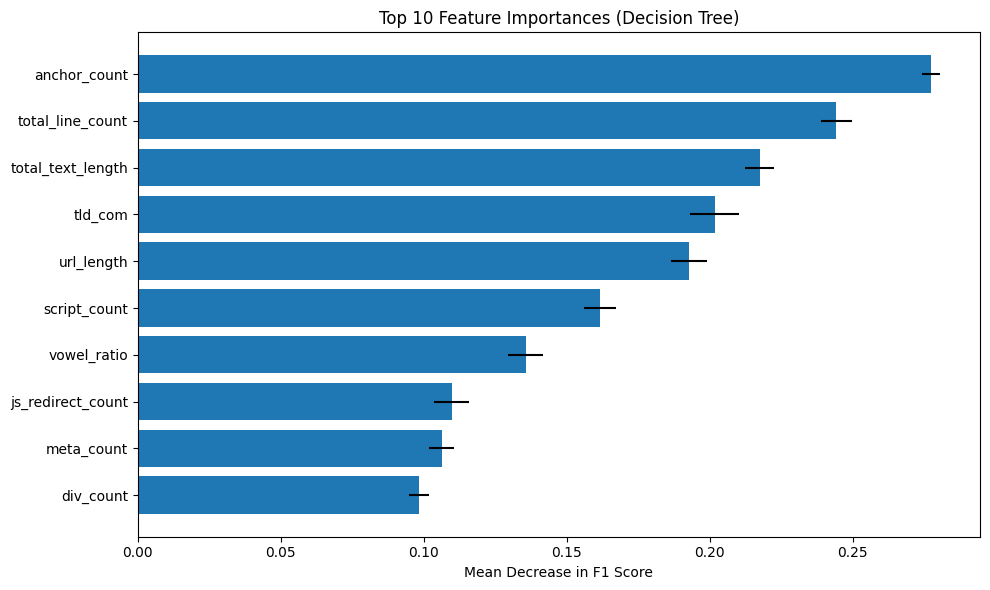

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Machine Learning Models
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.inspection import permutation_importance  

import time
from collections import Counter

# Load datasets
df1 = pd.read_csv('url_features.csv').sort_values(by='url')
df2 = pd.read_csv('new_html_features.csv').sort_values(by='url')
df3 = pd.merge(df1, df2, on="url")

df3 = pd.get_dummies(df3, columns=['tld_type'], prefix='tld')
df3 = df3.rename(columns={'label_x': 'label'})

# X3 = df3.drop(['url', 'label', 'label_y'], axis=1)
# y3 = df3['label']

# 25% - 174,268
n_legit = 168040
n_phish = 5228


# 50% - 348,536
# n_legit = 337080
# n_phish = 10456

legit_df3 = df3[df3['label'] == 0]
phish_df3 = df3[df3['label'] == 1]

sampled_legit3 = legit_df3.sample(n=n_legit, random_state=42)
sampled_phish3 = phish_df3.sample(n=n_phish, random_state=42)

reduced_df3 = pd.concat([sampled_legit3, sampled_phish3]).sample(frac=1, random_state=42).reset_index(drop=True)

X3 = reduced_df3.drop(['url', 'label', 'label_y'], axis=1)
y3 = reduced_df3['label']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify=y3, test_size=0.2, random_state=42)

# smote = SMOTE(sampling_strategy='auto', random_state=42)  
# X_resampled3, y_resampled3 = smote.fit_resample(X_train3, y_train3)


models = {
    # "XGBoost": XGBClassifier(n_estimators= 281, max_depth= 14, learning_rate= 0.0888992418241481, subsample= 0.9134952932290352, colsample_bytree= 0.6533354924947662, gamma= 0.25380562179671745, random_state=42),
    # "LightGBM": LGBMClassifier(num_leaves= 96, max_depth= 15, learning_rate= 0.16099354321038145, n_estimators= 292, subsample= 0.995245362847253, colsample_bytree= 0.883261087073046, min_child_samples= 25,random_state=42),
    # "Random Forest": RandomForestClassifier(n_estimators= 206, max_depth= 95, min_samples_split= 3, min_samples_leaf= 1, max_features= 'sqrt', random_state=42),
    # "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors= 18, weights= 'distance', p= 1, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(max_depth= 20, min_samples_split= 11, min_samples_leaf= 2, criterion='entropy', random_state=42)
}




for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train3, y_train3)
    pred = model.predict(X_test3)
    print(classification_report(y_test3, pred))

    # Permutation Importance with F1 Score
    print(f"Top 10 Permutation Importances for {name} (F1 Score):")
    result = permutation_importance(
        model, X_test3, y_test3, n_repeats=10, random_state=42, scoring='f1'
    )

    importances = result.importances_mean
    stds = result.importances_std
    sorted_idx = importances.argsort()[::-1][:10]

    top_features = X_test3.columns[sorted_idx]
    top_scores = importances[sorted_idx]
    top_stds = stds[sorted_idx]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_scores[::-1], xerr=top_stds[::-1])
    plt.xlabel("Mean Decrease in F1 Score")
    plt.title(f"Top 10 Feature Importances ({name})")
    plt.tight_layout()
    plt.show()
